In [1]:
import torch
import torch.nn.functional as F
from torch_geometric.datasets import Planetoid
from torch_geometric.nn import GCNConv

# Load the Cora dataset
dataset = Planetoid(root='data/Cora', name='Cora')
data = dataset[0]

# Define the GNN model
class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Train the model
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

# Test the model
def test():
    model.eval()
    out = model(data)
    pred = out.argmax(dim=1)
    correct = pred[data.test_mask] == data.y[data.test_mask]
    acc = int(correct.sum()) / int(data.test_mask.sum())
    return acc

# Initialize model and optimizer
model = GCN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# Train for 200 epochs
for epoch in range(200):
    loss = train()
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss:.4f}')

# Evaluate the model
accuracy = test()
print(f'Test Accuracy: {accuracy:.4f}')


Processing...
Done!


Epoch 0, Loss: 1.9436
Epoch 10, Loss: 0.6898
Epoch 20, Loss: 0.1426
Epoch 30, Loss: 0.0343
Epoch 40, Loss: 0.0161
Epoch 50, Loss: 0.0134
Epoch 60, Loss: 0.0144
Epoch 70, Loss: 0.0161
Epoch 80, Loss: 0.0169
Epoch 90, Loss: 0.0167
Epoch 100, Loss: 0.0158
Epoch 110, Loss: 0.0149
Epoch 120, Loss: 0.0141
Epoch 130, Loss: 0.0134
Epoch 140, Loss: 0.0128
Epoch 150, Loss: 0.0122
Epoch 160, Loss: 0.0118
Epoch 170, Loss: 0.0113
Epoch 180, Loss: 0.0110
Epoch 190, Loss: 0.0106
Test Accuracy: 0.8030


In [2]:
from sklearn.metrics import classification_report

out = model(data)
pred = out.argmax(dim=1)
print(classification_report(data.y[data.test_mask].cpu(), pred[data.test_mask].cpu()))


              precision    recall  f1-score   support

           0       0.65      0.74      0.69       130
           1       0.75      0.88      0.81        91
           2       0.88      0.90      0.89       144
           3       0.92      0.73      0.82       319
           4       0.77      0.86      0.81       149
           5       0.84      0.77      0.80       103
           6       0.67      0.88      0.76        64

    accuracy                           0.80      1000
   macro avg       0.78      0.82      0.80      1000
weighted avg       0.82      0.80      0.80      1000



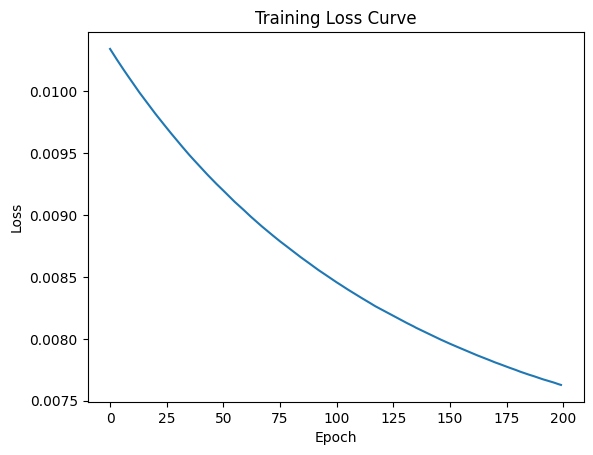

In [3]:
import matplotlib.pyplot as plt

losses = []
for epoch in range(200):
    loss = train()
    losses.append(loss)

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()
